PROJECT OUTFIT RECOMMENDER

Import Main Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Exploratory Data Analysis 

In [43]:
df=pd.read_excel("outfit project 2.xlsx")

In [44]:
df.head()

,gender,category,sub_category,height_cm,weight_kg,skin_tone,body_shape,outfit_image_url
0,female,traditional,saree,0.5,0.6,dusky,hourglass,1
1,male,traditional,kurta-pajamas,0.5,0.8,brown,rectangle,2
2,female,western,jeans-top,0.5,0.6,white,triangle,3
3,male,western,shirts-pants,0.6,0.9,black,inverted triangle,4
4,female,traditional,lehnga,0.4,0.5,brown,square,5


SPLITTING X AND Y VARIABLES 

Encoding String Columns To Numerical 

In [45]:
X=df.drop(['outfit_image_url','sub_category'], axis=1)

In [46]:
X_encoded = pd.get_dummies(X)

In [47]:
X_encoded.head()

,height_cm,weight_kg,gender_female,gender_male,category_traditional,category_western,skin_tone_black,skin_tone_brown,skin_tone_dusky,skin_tone_white,body_shape_hourglass,body_shape_inverted triangle,body_shape_rectangle,body_shape_square,body_shape_triangle
0,0.5,0.6,True,False,True,False,False,False,True,False,True,False,False,False,False
1,0.5,0.8,False,True,True,False,False,True,False,False,False,False,True,False,False
2,0.5,0.6,True,False,False,True,False,False,False,True,False,False,False,False,True
3,0.6,0.9,False,True,False,True,True,False,False,False,False,True,False,False,False
4,0.4,0.5,True,False,True,False,False,True,False,False,False,False,False,True,False


In [48]:
X_encoded.columns

Index(['height_cm', 'weight_kg', 'gender_female', 'gender_male',
       'category_traditional', 'category_western', 'skin_tone_black',
       'skin_tone_brown', 'skin_tone_dusky', 'skin_tone_white',
       'body_shape_hourglass', 'body_shape_inverted triangle',
       'body_shape_rectangle', 'body_shape_square', 'body_shape_triangle'],
      dtype='object')

In [49]:
Y= df["sub_category"]

In [50]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [51]:
print(Y_encoded)

[ 8  4  3  9  5  0  1 10  2  7  9  6  4 11  9  8  0  3 10  1  4  8  1  5
 11 11  2]


In [52]:
Y_encoded.ndim

1

In [53]:
X_encoded.shape

(27, 15)

In [54]:
Y_encoded.reshape(27,1)

array([[ 8],
       [ 4],
       [ 3],
       [ 9],
       [ 5],
       [ 0],
       [ 1],
       [10],
       [ 2],
       [ 7],
       [ 9],
       [ 6],
       [ 4],
       [11],
       [ 9],
       [ 8],
       [ 0],
       [ 3],
       [10],
       [ 1],
       [ 4],
       [ 8],
       [ 1],
       [ 5],
       [11],
       [11],
       [ 2]])

VISUALIZE THE DATA BY USING MATPLOTLIB

C:\Users\Nitika\AppData\Local\Temp\ipykernel_22452\812105778.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plot = plt.scatter(X_data, Y_data, cmap='viridis', s=100, alpha=0.7,edgecolors='w')


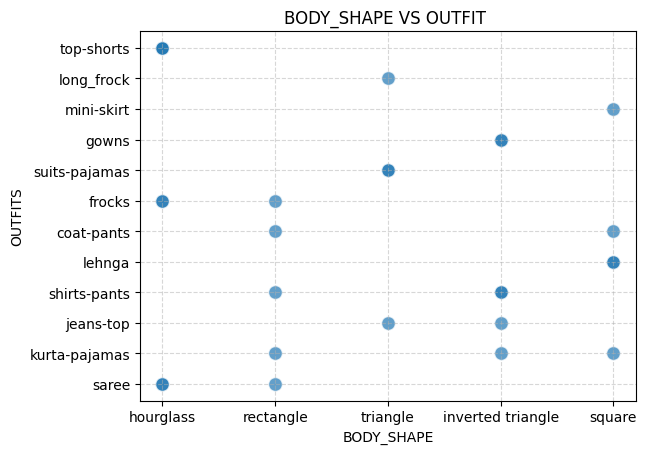

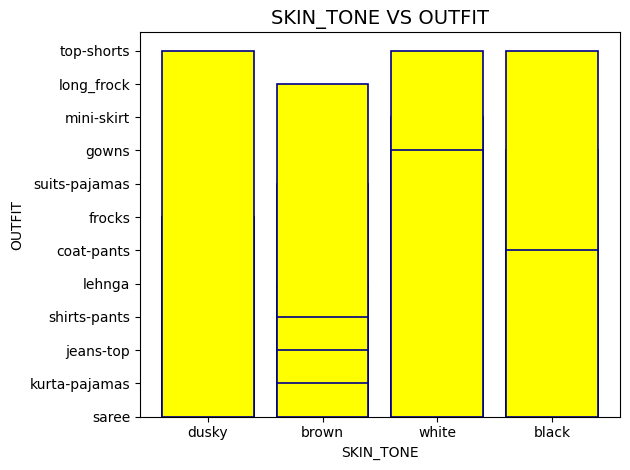

In [79]:
X_data = df['body_shape']
x=df['skin_tone']
Y_data = df['sub_category']

plot = plt.scatter(X_data, Y_data, cmap='viridis', s=100, alpha=0.7,edgecolors='w')
plt.title("BODY_SHAPE VS OUTFIT ")
plt.xlabel("BODY_SHAPE")
plt.ylabel("OUTFITS")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.bar(x, Y_data, color='yellow', edgecolor='darkblue',linewidth=1.2)

# --- 3. Styling and Output ---
plt.title("SKIN_TONE VS OUTFIT", fontsize=14)
plt.xlabel("SKIN_TONE", fontsize=10)
plt.ylabel("OUTFIT", fontsize=10)

#  Add grid lines for comparison
#plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



TRAINING AND SPLITTING DATA X AND Y 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train_x,test_x,train_y,test_y=train_test_split(X_encoded,Y_encoded,test_size=0.3,random_state=42)

In [58]:
print( test_x,test_y)

    height_cm  weight_kg  gender_female  gender_male  category_traditional  \
8         0.5        0.7           True        False                 False   
13        0.5        0.5           True        False                 False   
9         0.5        0.5           True        False                 False   
21        0.4        0.7           True        False                  True   
0         0.5        0.6           True        False                  True   
11        0.5        0.6           True        False                  True   
16        0.5        0.7          False         True                 False   
17        0.5        0.5           True        False                 False   
12        0.5        0.6          False         True                  True   

    category_western  skin_tone_black  skin_tone_brown  skin_tone_dusky  \
8               True             True            False            False   
13              True             True            False            Fal

Scaling of numerical columns

In [59]:

scaler = StandardScaler()
numerical_cols = ['height_cm', 'weight_kg']
train_x[numerical_cols] = scaler.fit_transform(train_x[numerical_cols])
test_x[numerical_cols] = scaler.transform(test_x[numerical_cols])

MODEL TRAINING

In [60]:
## CHOOSING LOGISTIC AS IT HAS 94% ACCURACY WHILE KNN IS 72% ACCURATE & SVM IS 60% ACCURATE 

In [61]:
from sklearn.linear_model import LogisticRegression 

In [62]:
model = LogisticRegression(max_iter=1000, random_state=42)

In [63]:
model.fit(train_x,train_y)

LogisticRegression(max_iter=1000, random_state=42)

In [64]:
model.predict(test_x)

array([ 1, 11, 11,  5, 11, 10,  9, 11, 10])

In [65]:
model.score(train_x,train_y) # MODEL ACCURACY 

0.9444444444444444

NOW TESTING OUR MODEL BY TAKING INPUT FROM USER

In [66]:
MOCK_TRAIN_COLUMNS = ['height_cm', 'weight_kg', 'gender_female', 'gender_male',
       'category_traditional', 'category_western', 
       'skin_tone_black', 'skin_tone_brown', 'skin_tone_dusky',
       'skin_tone_white', 'body_shape_hourglass',
       'body_shape_inverted triangle', 'body_shape_rectangle',
       'body_shape_square', 'body_shape_triangle']

def user_input(gender, height_cm, weight_kg, skin_tone, body_shape, category):
    
    # 1. Create a temporary DataFrame from the simple user inputs
    new_user_data = pd.DataFrame({
        'gender': [gender], 
        'height_cm': [height_cm], 
        'weight_kg': [weight_kg], 
        'skin_tone': [skin_tone], 
        'body_shape': [body_shape],
        'category': [category]  
    })
    
    # 2. Apply One-Hot Encoding to the categorical features
    new_user_encoded = pd.get_dummies(new_user_data, drop_first=True)
    
    # 3. CRUCIAL STEP: Align columns with the full set of training features
    # This ensures the new input has all 27 columns in the correct order, 
    aligned_input = new_user_encoded.reindex(columns=MOCK_TRAIN_COLUMNS, fill_value=0)
    aligned_input[numerical_cols] = scaler.transform(aligned_input[numerical_cols])
    
    return aligned_input
    

user_input_df = user_input(
    gender='female', height_cm=0.5, weight_kg=0.6, skin_tone='brown', 
    body_shape='hourglass', category='western'
)



In [67]:
prediction = model.predict(user_input_df)
predicted_outfit = label_encoder.inverse_transform([prediction])

C:\Users\Nitika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
print(predicted_outfit)

['frocks']


MAKING PICKLE FILE 

In [69]:
f=open("xyz.pkl","wb")

In [70]:
f.close()

In [71]:
import pickle

In [72]:
pickle.dump(model,open("xyz.pkl","wb"))